#prepare zone 


In [ ]:
## mount google drive 
from google.colab import drive
drive.mount('/content/gdrive')
!ls -la "/content/gdrive/My Drive/songdata1"
## check cuda version 
!/usr/local/cuda/bin/nvcc --version
## unzip cuDNN for Nvidia deep learning 


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
total 3454808
drwx------ 2 root root      4096 Oct 22 16:24  chinese
-rw------- 1 root root  43905990 Oct 12 10:06  chinese1.1.wav
-rw------- 1 root root  43882058 Oct 12 10:06  chinese1.2.wav
-rw------- 1 root root  43399982 Oct 13 08:00  chinese1.3.wav
-rw------- 1 root root  45125318 Oct 13 07:59  chinese1.4.wav
-rw------- 1 root root  43970634 Oct 13 07:59  chinese1.5.wav
-rw------- 1 root root  52932686 Oct 13 07:59  chinese1.6.wav
-rw------- 1 root root  39616590 Oct 13 07:59  chinese1.7.wav
drwx------ 2 root root      4096 Oct 22 15:02  eng
-rw------- 1 root root  39922562 Oct 13 06:45  eng1.10.wav
-rw------- 1 root root  39293006 Oct 13 06:45  eng1.11.wav
-rw------- 1 root root  51990994 Oct 12 10:07  eng1.1.wav
-rw------- 1 root root  41685790 Oct 12 10:07  eng1.2.wav
-rw------- 1 root root  44866738 Oct 13 06:46  eng1.3.wav
-rw------- 1 root root 

In [ ]:
!pip install pydub

In [ ]:
!pip install opencv-python

In [ ]:
from keras.layers import Dense, Flatten, LSTM, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation
import os                                         ## package for file path system
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical            ## encode numbers to one-hot encode form
from sklearn.preprocessing import LabelEncoder    ## encode string labels to numbers 
import cv2
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import pydub
from scipy.io.wavfile import read, write
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dropout
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from scipy.io.wavfile import read, write

In [ ]:
drive.mount('/content/gdrive')
folders = ['/content/gdrive/My Drive/songdata1/thai',      
           '/content/gdrive/My Drive/songdata1/japan',
           '/content/gdrive/My Drive/songdata1/eng',      
           '/content/gdrive/My Drive/songdata1/chinese',
          ]

images = []                                                   # input image list 
labels = []                                                   # image label list 
                
def load_images_from_folder(folder):             # function to read image files from a given folder    
    for filename in os.listdir(folder):          # for each image file in the folder         
        img = cv2.imread(os.path.join(folder, filename))  # read an image file           
        img = cv2.resize(img, (32,32))        
        images.append(img)                         # append the image data 
        label = folder.split(os.path.sep)[-1]      # get a label for the image 
        labels.append(label)                       # append the label 

def convert_images(images):
    X = np.array(images)          
    return X

def convert_labels(labels):
    enc = LabelEncoder()                        
    P = enc.fit_transform(labels)                ## convert string labels to numbers 
    Y = to_categorical(P)                        ## convert number to one-hot-encode form 
    return Y

for folder in folders:                                                            
    print('Reading images from path: ' + folder)
    load_images_from_folder(folder)           
X = convert_images(images)
Y = convert_labels(labels)

Mounted at /content/gdrive
Reading images from path: /content/gdrive/My Drive/songdata1/thai
Reading images from path: /content/gdrive/My Drive/songdata1/japan
Reading images from path: /content/gdrive/My Drive/songdata1/eng
Reading images from path: /content/gdrive/My Drive/songdata1/chinese


In [ ]:
print(X.shape)
print(Y.shape)


(627, 32, 32, 3)
(627, 4)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape)
print(Y_train.shape)

(438, 32, 32, 3)
(438, 4)



#Training Zone                                                                                           


In [ ]:
cnn = Sequential()
cnn.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(16, (5, 5), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())        
cnn.add(Dense(120, activation='relu'))
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(4, activation='softmax'))

cnn.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer='adam')
print(cnn.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_23 (Dense)             (None, 84)               

In [ ]:
drive.mount('/content/gdrive')
cnn = load_model('/content/gdrive/My Drive/songdata1/final_model.h5') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
history = cnn.fit(X_train, Y_train, epochs=1000, verbose=1)
#history = model.fit(X_train, Y_train, epochs=50, verbose=1)

Epoch 1/1000
438/438 [==============================] - 1s 2ms/step - loss: 0.5459 - acc: 0.7500
Epoch 2/1000
438/438 [==============================] - 0s 230us/step - loss: 0.5276 - acc: 0.7494
Epoch 3/1000
438/438 [==============================] - 0s 230us/step - loss: 0.5167 - acc: 0.7517
Epoch 4/1000
438/438 [==============================] - 0s 227us/step - loss: 0.5027 - acc: 0.7654
Epoch 5/1000
438/438 [==============================] - 0s 229us/step - loss: 0.4889 - acc: 0.7637
Epoch 6/1000
438/438 [==============================] - 0s 224us/step - loss: 0.4797 - acc: 0.7814
Epoch 7/1000
438/438 [==============================] - 0s 237us/step - loss: 0.4590 - acc: 0.7917
Epoch 8/1000
438/438 [==============================] - 0s 231us/step - loss: 0.4499 - acc: 0.7928
Epoch 9/1000
438/438 [==============================] - 0s 236us/step - loss: 0.4309 - acc: 0.8014
Epoch 10/1000
438/438 [==============================] - 0s 226us/step - loss: 0.4157 - acc: 0.8168
Epoch 11/10

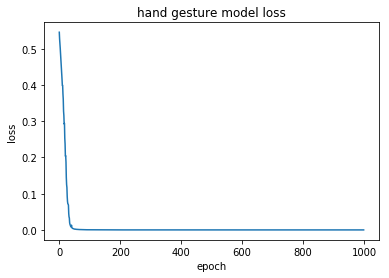

In [ ]:
plt.plot(history.history['loss'])
plt.title('hand gesture model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#cnn.save("/content/gdrive/My Drive/songdata1/model.h5")  
drive.mount('/content/gdrive')
cnn.save("/content/gdrive/My Drive/songdata1/final_model.h5") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Prediction Zone 

In [ ]:
score = cnn.evaluate(X_test, Y_test)
print(cnn.metrics_names)
print(score)

189/189 [==============================] - 0s 1ms/step
['loss', 'acc']
[1.9846049168753246, 0.7751322729246957]


In [ ]:
def create_test_data(music):
  dataX = []
  for i in range(len(music)-1):
    dataX.append(music.iloc[i])
    if(i%44100==0):
      print(i)
  return np.array(dataX)

In [ ]:
start_for_predict = 882000
end_for_predict = start_for_predict+441000+1
n = 10
seq = 1
name = "eng1.11"

In [ ]:
# converting mp3 file to wav file",
sound = pydub.AudioSegment.from_mp3("{}.mp3".format(name)),
sound.export("{}.wav".format(name), format="wav"),

In [ ]:
drive.mount('/content/gdrive')
rate, music_test = read('/content/gdrive/My Drive/songdata1/{}.wav'.format(name))
music_test = pd.DataFrame(music_test[0:12000000, :])
test = []
for i in range (n):
  test.append(create_test_data(pd.concat([music_test.iloc[start_for_predict:end_for_predict, :]],axis=1)).reshape(441000, 2))
  start_for_predict+=441000
  end_for_predict+=441000
  print('Round {} has done'.format(i+1))


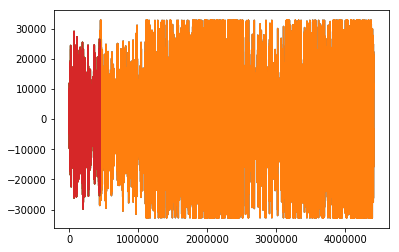

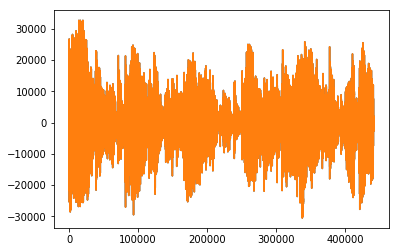

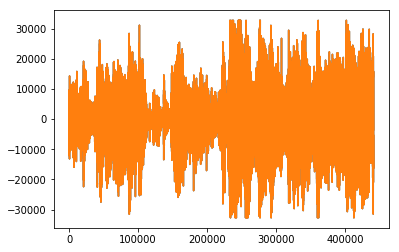

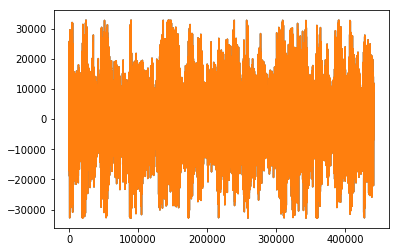

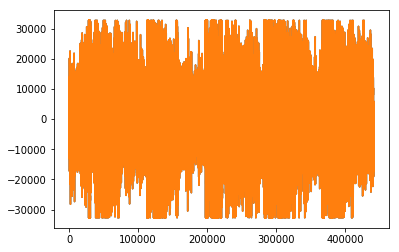

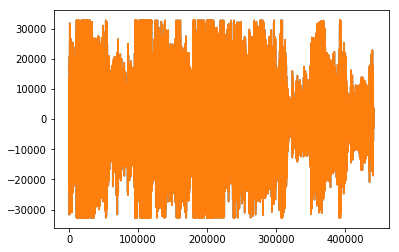

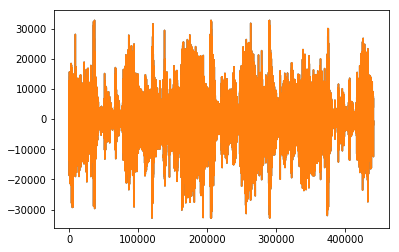

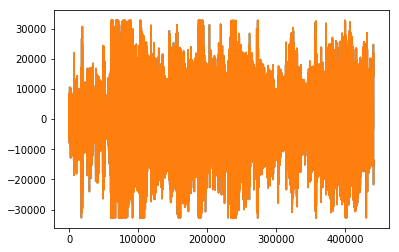

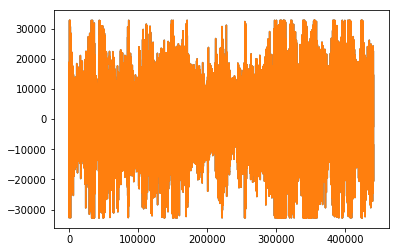

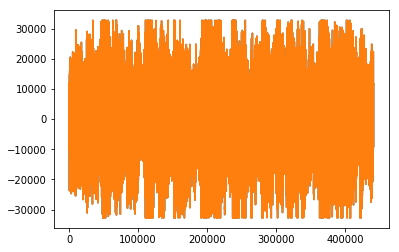

In [ ]:
test = np.array(test)
result = test.reshape(4410000,2)
plt.plot(result) 
plt.savefig('/content/gdrive/My Drive/songdata1/test/test{}.{}.jpeg'.format(seq,"index")) 
for i in range (n):
  result = test[i].reshape(441000,2)
  plt.plot(result) 
  plt.savefig('/content/gdrive/My Drive/songdata1/test/test{}.{}.jpeg'.format( 1 ,i+1)) 
  plt.show()

In [ ]:
drive.mount('/content/gdrive')
prd = []
for i in range(n):
  img = cv2.imread('/content/gdrive/My Drive/songdata1/test/test{}.{}.jpeg'.format( seq ,i+1),cv2.IMREAD_COLOR)  # read an image file 
  img = cv2.resize(img, (32,32))
  listsong = ['chinese','eng','japan','thai']
  y_predict=cnn.predict([[img]])
  for i in range(4):
    if(y_predict[0][i] == 1):
      print(listsong[i],end=" : ")
      prd.append(i)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
eng : eng : eng : eng : thai : eng : eng : eng : thai : eng : 

In [ ]:
listsong = ['chinese','eng','japan','thai']
from collections import Counter 
d = Counter(prd) 
mx = 0
for i in range(len(listsong)):
  if(d[i] > d[mx]):
    mx = i
  print('{} has chance {} %'.format(listsong[i], round(d[i]*100/n,2))) 

chinese has chance 0.0 %
eng has chance 80.0 %
japan has chance 0.0 %
thai has chance 20.0 %


In [ ]:
print("So I think this Song is : ",listsong[mx])

So I think this Song is :  eng


#Performance_evaluation

In [ ]:
score = cnn.evaluate(X_test, Y_test)
print(cnn.metrics_names)
print(score)

126/126 [==============================] - 0s 2ms/step
['loss', 'acc']
[3.233618214016869, 0.7976190542417859]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state = 2)


In [ ]:
target_names = ['chinese','eng','japan','thai']
yhat = cnn.predict(X_test) 

In [ ]:
from numpy import argmax
yhat = np.argmax(yhat, axis=1) 
Y_test = np.argmax(Y_test, axis=1) 
print(yhat)
print(Y_test)


[0 0 1 2 2 3 0 0 3 3 1 3 3 2 1 3 2 2 3 0 3 3 1 3 3 1 3 0 2 1 2 2 2 2 0 2 2
 3 2 3 1 2 2 3 3 3 1 0 1 2 2 1 2 2 2 1 3 2 3 0 3 2 2 0 3 2 0 0 3 3 2 3 3 3
 2 3 0 2 2 2 0 3 2 0 2 2 2 3 0 3 2 3 2 2 2 3 1 0 3 3 2 2 1 2 2 3 3 3 3 3 2
 0 1 3 3 0 2 2 3 3 3 2 0 2 2 3 3 0 1 2 3 3 1 0 3 2 3 3 2 2 1 1 2 3 3 3 3 1
 2 1 1 1 2 3 2 3 0 1 3 3 2 2 3 0 3 3 3 3 2 3 3 3 0 2 1 2 2 3 1 2 2 0 3 3 2
 2 0 3 3 0 2 3 3 0 3 0 0 3 3 0 1 3 1 3 3 3 2 2 0 3 1 3 1 3 2 1 3 0 3 0 1 2
 2 3 2 2 1 2 1 2 1 0 2 2 3 3 2 2 1 3 3 2 0 2 3 1 2 0 2 0 3 1 3 1 0 3 3 3 0
 3 1 3 2 2 0 2 1 1 1 0 1 3 0 2 3 2 3 2 3 3 3 2 1 1 1 3 3 3 1 3 1 0 1 3 2 2
 2 3 2 1 3 2 3 2 2 3 2 3 3 2 3 2 0 1 0 3 2 0 1 2 3 3 0 3 2 1 3 2 2 3 2 1 2
 2 0 3 3 1 1 1 3 2 2 1 2 3 1 3 2 2 2 0 1 3 0 0 2 0 2 3 3 2 2 2 3 0 0 3 2 3
 1 0 3 1 3 0 3 3 2 2 3 2 2 3 3 1 2 2 2 3 2 0 3 3 3 3 0 1 2 2 3 1 3 1 2 3 3
 2 2 1 3 1 2 2 2 3 1 0 2 1 3 0 3 1 2 3 3 2 3 1 2 3 3 1 0 3 3 0 0 2 2 2 2 1
 2 3 3 3 2 2 3 2 2 3 3 2 2 2 3 0 2 3 1 1 2 3 2 0 3 0 2 1 0 2 2 1 2 1 3 3 2
 2 3 0 3 0 3 3 3 2 1 2 2 

In [ ]:
print(metrics.classification_report(Y_test, yhat, target_names=target_names))  
print(metrics.confusion_matrix(Y_test, yhat))    

              precision    recall  f1-score   support

     chinese       0.88      0.99      0.93        76
         eng       0.94      0.83      0.88       108
       japan       0.91      0.91      0.91       180
        thai       0.91      0.93      0.92       201

    accuracy                           0.91       565
   macro avg       0.91      0.91      0.91       565
weighted avg       0.91      0.91      0.91       565

[[ 75   0   0   1]
 [  2  90   9   7]
 [  2   5 163  10]
 [  6   1   8 186]]


In [ ]:
metrics.accuracy_score(Y_test, yhat)

0.9097345132743363



---
#Image Generator ( Autosave )

---


# เพลงที่แปลงแล้ว

*   thai1.1
*   thai1.2
*   thai1.3
*   thai1.4
*   thai1.5
*   thai1.6
*   thai1.7
*   thai1.8
*   thai1.9
*   thai1.10
*   thai1.11
*   thai1.12
*   thai1.13
*   thai1.14
*   thai1.15
*   thai1.16
*   thai1.17
*   thai1.18
*   thai1.19
*   thai1.20
---
*   japan1.1
*   japan1.2
*   japan1.3
*   japan1.4
*   japan1.5
*   japan1.6
*   japan1.7
*   japan1.8
*   japan1.9
*   japan1.10 #error
*   japan1.11
*   japan1.12
*   japan1.13
*   japan1.14
*   japan1.15
*   japan1.16
*   japan1.17
*   japan1.18
*   japan1.19
*   japan1.20 #error
---
*   eng1.1
*   eng1.2
*   eng1.3
*   eng1.4
*   eng1.5
*   eng1.6
*   eng1.7
*   eng1.8
*   eng1.9
*   eng1.10
*   eng1.11
---
*   chinese1.1
*   chinese1.2
*   chinese1.3
*   chinese1.4
*   chinese1.5
*   chinese1.6
*   chinese1.7

In [ ]:
def create_test_data(music):
  dataX = []
  for i in range(len(music)-1):
    dataX.append(music.iloc[i])
  return np.array(dataX)

In [ ]:
list_Name = ['thai','japan','eng','chinese']
start_for_predict = 882000
end_for_predict = start_for_predict+441000+1
n = 10  

In [ ]:
#เปลียนเฉพาะตรงนี้
List_Number = 0 #ชือเพลง จาก list_Name
seq = 11 #ลำดับ

In [ ]:
drive.mount('/content/gdrive')
rate, music_test = read('/content/gdrive/My Drive/songdata1/{}1.{}.wav'.format(list_Name[List_Number],seq))
music_test = pd.DataFrame(music_test[0:12000000, :])
test = []
for i in range (n):
  test.append(create_test_data(pd.concat([music_test.iloc[start_for_predict:end_for_predict, :]],axis=1)).reshape(441000, 2))
  start_for_predict+=441000
  end_for_predict+=441000
  print('Round {} has done'.format(i+1))

In [ ]:
test = np.array(test)
result = test.reshape(4410000,2)
plt.plot(result) 
plt.savefig('/content/gdrive/My Drive/songdata1/{}/{}{}.{}.jpeg'.format(list_Name[List_Number],list_Name[List_Number],seq,"index")) 
for i in range (n):
  result = test[i].reshape(441000,2)
  plt.plot(result) 
  plt.savefig('/content/gdrive/My Drive/songdata1/{}/{}{}.{}.jpeg'.format(list_Name[List_Number],list_Name[List_Number],seq,i+1)) 
  plt.show()